In [1]:
import numpy as np
from scipy import misc
import cv2
import matplotlib.pyplot as plt
import time
import json
%matplotlib inline

In [2]:
import os
import sys

In [3]:
CAFFE_ROOT = '/home/albert/github/tensorflow/'
# CAFFE_ROOT = '/Users/tradergllc/github/tensorflow/'
train_img_dir = os.listdir(CAFFE_ROOT + 'data/market-1501/bounding_box_train')
test_img_dir = os.listdir(CAFFE_ROOT + 'data/market-1501/bounding_box_test')

In [4]:
train_dict = {}
train_files = []
train_labels = []

for f in train_img_dir:
    if f[-4:] == '.jpg':
        idt = int(f[0:f.index('_')])
        if not any(idt == l for l in train_labels):
            train_labels.append(idt)
            train_dict[idt] = []
        path = CAFFE_ROOT + 'data/market-1501/bounding_box_train/' + f
        train_files.append([path, idt])
        train_dict[idt].append(path)

train_labels.sort()

In [5]:
test_dict = {}
test_files = []
test_labels = []

for f in test_img_dir:
    if f[-4:] == '.jpg':
        idt = int(f[0:f.index('_')])
        if idt != 0 and idt != -1:
            if not any(idt == l for l in test_labels):
                test_labels.append(idt)
                test_dict[idt] = []
            path = CAFFE_ROOT + 'data/market-1501/bounding_box_test/' + f
            test_files.append([path, idt])
            test_dict[idt].append(path)
        
test_labels.sort()

In [8]:
BODY_PARTS = [
    "Nose",
    "Neck",
    "RShoulder",
    "RElbow",
    "RWrist",
    "LShoulder",
    "LElbow",
    "LWrist",
    "RHip",
    "RKnee",
    "RAnkle",
    "LHip",
    "LKnee",
    "LAnkle",
    "REye",
    "LEye",
    "REar",
    "LEar",
    "Bkg",
]

In [67]:
def exists_keypoints(img_path, shape=(128,64), train=False, thresh=0.5):
    if img_path.find('/') > -1:
        root = img_path[len(img_path) - img_path[::-1].index('/'):-4:]
    else:
        root = img_path[0:img_path.index('.')]
    
    DATA_ROOT = '/home/albert/github/tensorflow/'
    if train:
        keypoint_path = DATA_ROOT + \
                        'data/market-1501/train_openpose/train_keypoints/%s_keypoints.json' % root
    else:
        keypoint_path = DATA_ROOT + \
                        'data/market-1501/test_openpose/test_keypoints/%s_keypoints.json' % root
    
    body_part_freq = np.ones((len(BODY_PARTS)), dtype=np.int64)
    
    with open(keypoint_path) as data_file:
        data = json.load(data_file)
    for person in range(len(data['people'])):
        for i in range(0, len(data['people'][person]['pose_keypoints']), 3):
            x_key = data['people'][person]['pose_keypoints'][i] * shape[1] / 64.0
            y_key = data['people'][person]['pose_keypoints'][i + 1] * shape[0] / 128.0
            c_key = data['people'][person]['pose_keypoints'][i + 2]
            
            if (x_key == 0 and y_key == 0) or c_key < thresh:
                body_part_freq[i / 3] = 0

    return body_part_freq.astype(np.int64)

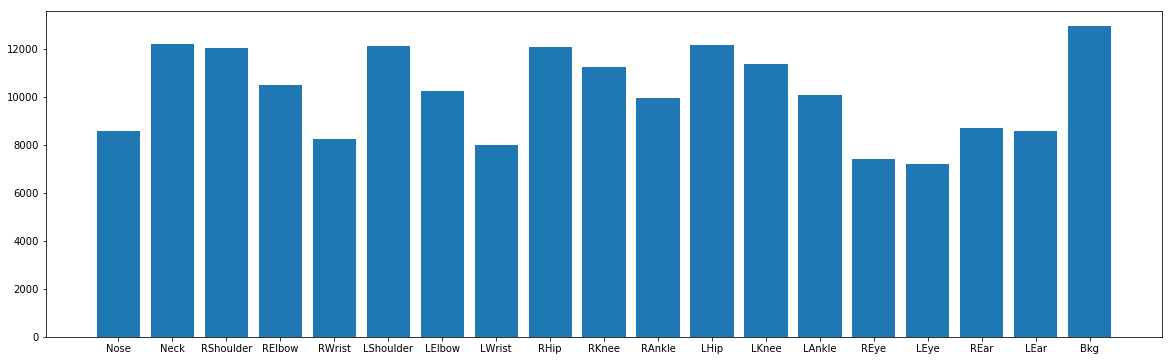

In [93]:
body_part_freq = np.zeros((len(BODY_PARTS)), dtype=np.int64)
for f in train_files:
    body_part_freq = body_part_freq + exists_keypoints(f[0], train=True, thresh=0.0)

plt.figure(figsize=(20,6))
plt.bar(np.arange(19), body_part_freq)
plt.xticks(np.arange(19), BODY_PARTS)
plt.show()

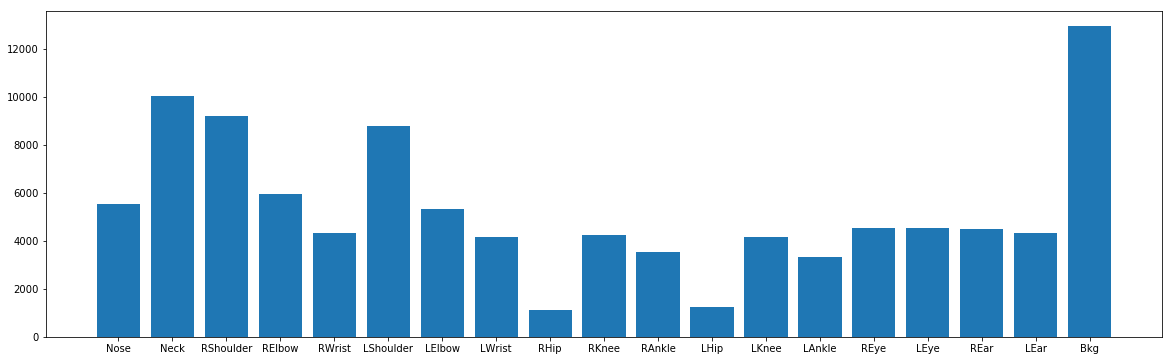

In [89]:
body_part_freq = np.zeros((len(BODY_PARTS)), dtype=np.int64)
for f in train_files:
    body_part_freq = body_part_freq + exists_keypoints(f[0], train=True)

plt.figure(figsize=(20,6))
plt.bar(np.arange(19), body_part_freq)
plt.xticks(np.arange(19), BODY_PARTS)
plt.show()